# Graphviz Demo notebook. You must install a few things first. 

``pip install git+https://github.com/tla/ipython-hierarchymagic.git``

``conda install graphviz``
(maybe pip install will work)

In [1]:
%load_ext hierarchymagic

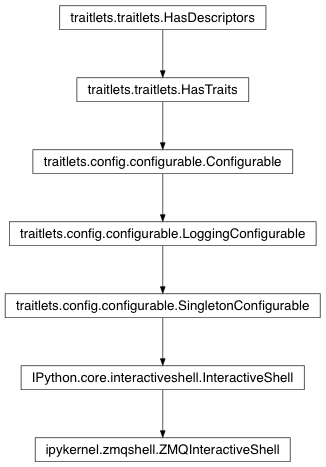

In [2]:
%hierarchy get_ipython()

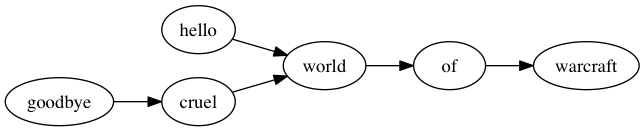

In [3]:
%%dot 

digraph G { 
    rankdir=LR;
    hello -> world;
    goodbye -> cruel -> world;
    world -> of -> warcraft;
}

In [4]:
from graphviz import Digraph

dot = Digraph(comment='The Round Table')
dot  #doctest: +ELLIPSIS

In [5]:
dot.node('A', 'King Arthur')
dot.node('B', 'Sir Bedevere the Wise')
dot.node('L', 'Sir Lancelot the Brave')
dot.edges(['AB', 'AL'])
dot.edge('B', 'L', constraint='false')

In [6]:
print(dot.source)  # doctest: +NORMALIZE_WHITESPACE

// The Round Table
digraph {
	A [label="King Arthur"]
	B [label="Sir Bedevere the Wise"]
	L [label="Sir Lancelot the Brave"]
	A -> B
	A -> L
	B -> L [constraint=false]
}


In [7]:
dot.render('test-output/round-table.gv', view=True)

'test-output/round-table.gv.pdf'

[Easier online tool](http://www.webgraphviz.com/)
to figure out your code (in dot)

[Better online tool](https://dreampuf.github.io/GraphvizOnline/) which also generates files for you. (Make sure to save the code for your archives!)

[Some examples](http://graphs.grevian.org/example), help, and renderer. 

You can upload your `gv` file to [this one](https://stamm-wilbrandt.de/GraphvizFiddle/#).

In [8]:
?dot.edge

In [9]:
Digraph?

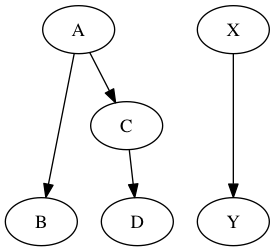

In [10]:
%%dot
digraph G { 
  rankdir = TB;
  subgraph {
    A -> B
    A -> C
    C -> D
    X -> Y
    // note that rank is used in the subgraph
    {rank = same; A; X;}
    {rank = same; B; D; Y;}
  } /* closing subgraph */
}

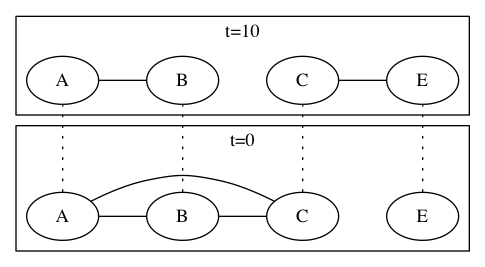

In [14]:
%%dot 
graph {
    rankdir=LR;
    subgraph cluster01 {
        label="t=0";
        a0 [label="A"];
        a1 [label="B"];
        a2 [label="C"];
        a5 [label="E"];
        a0 -- a1;
        a1 -- a2;
        a2 -- a5 [style=invis];
        a2 -- a0 [constraint=false];
    };

    subgraph cluster02
    {
        label="t=10"
        b0 [label="A"];
        b5 [label="E"];
        b1 [label="B"];
        b2 [label="C"];

        b0 -- b1;
        b1 -- b2 [style=invis];
        b2 -- b5;
    };

    edge[constraint=false];
    a0--b0 [style=dotted];
    a1--b1 [style=dotted];
    a2--b2 [style=dotted];
    a5--b5 [style=dotted];
}

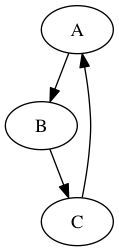

In [25]:
%%dot
digraph {
  A->B  
  B->C
  C->A
}

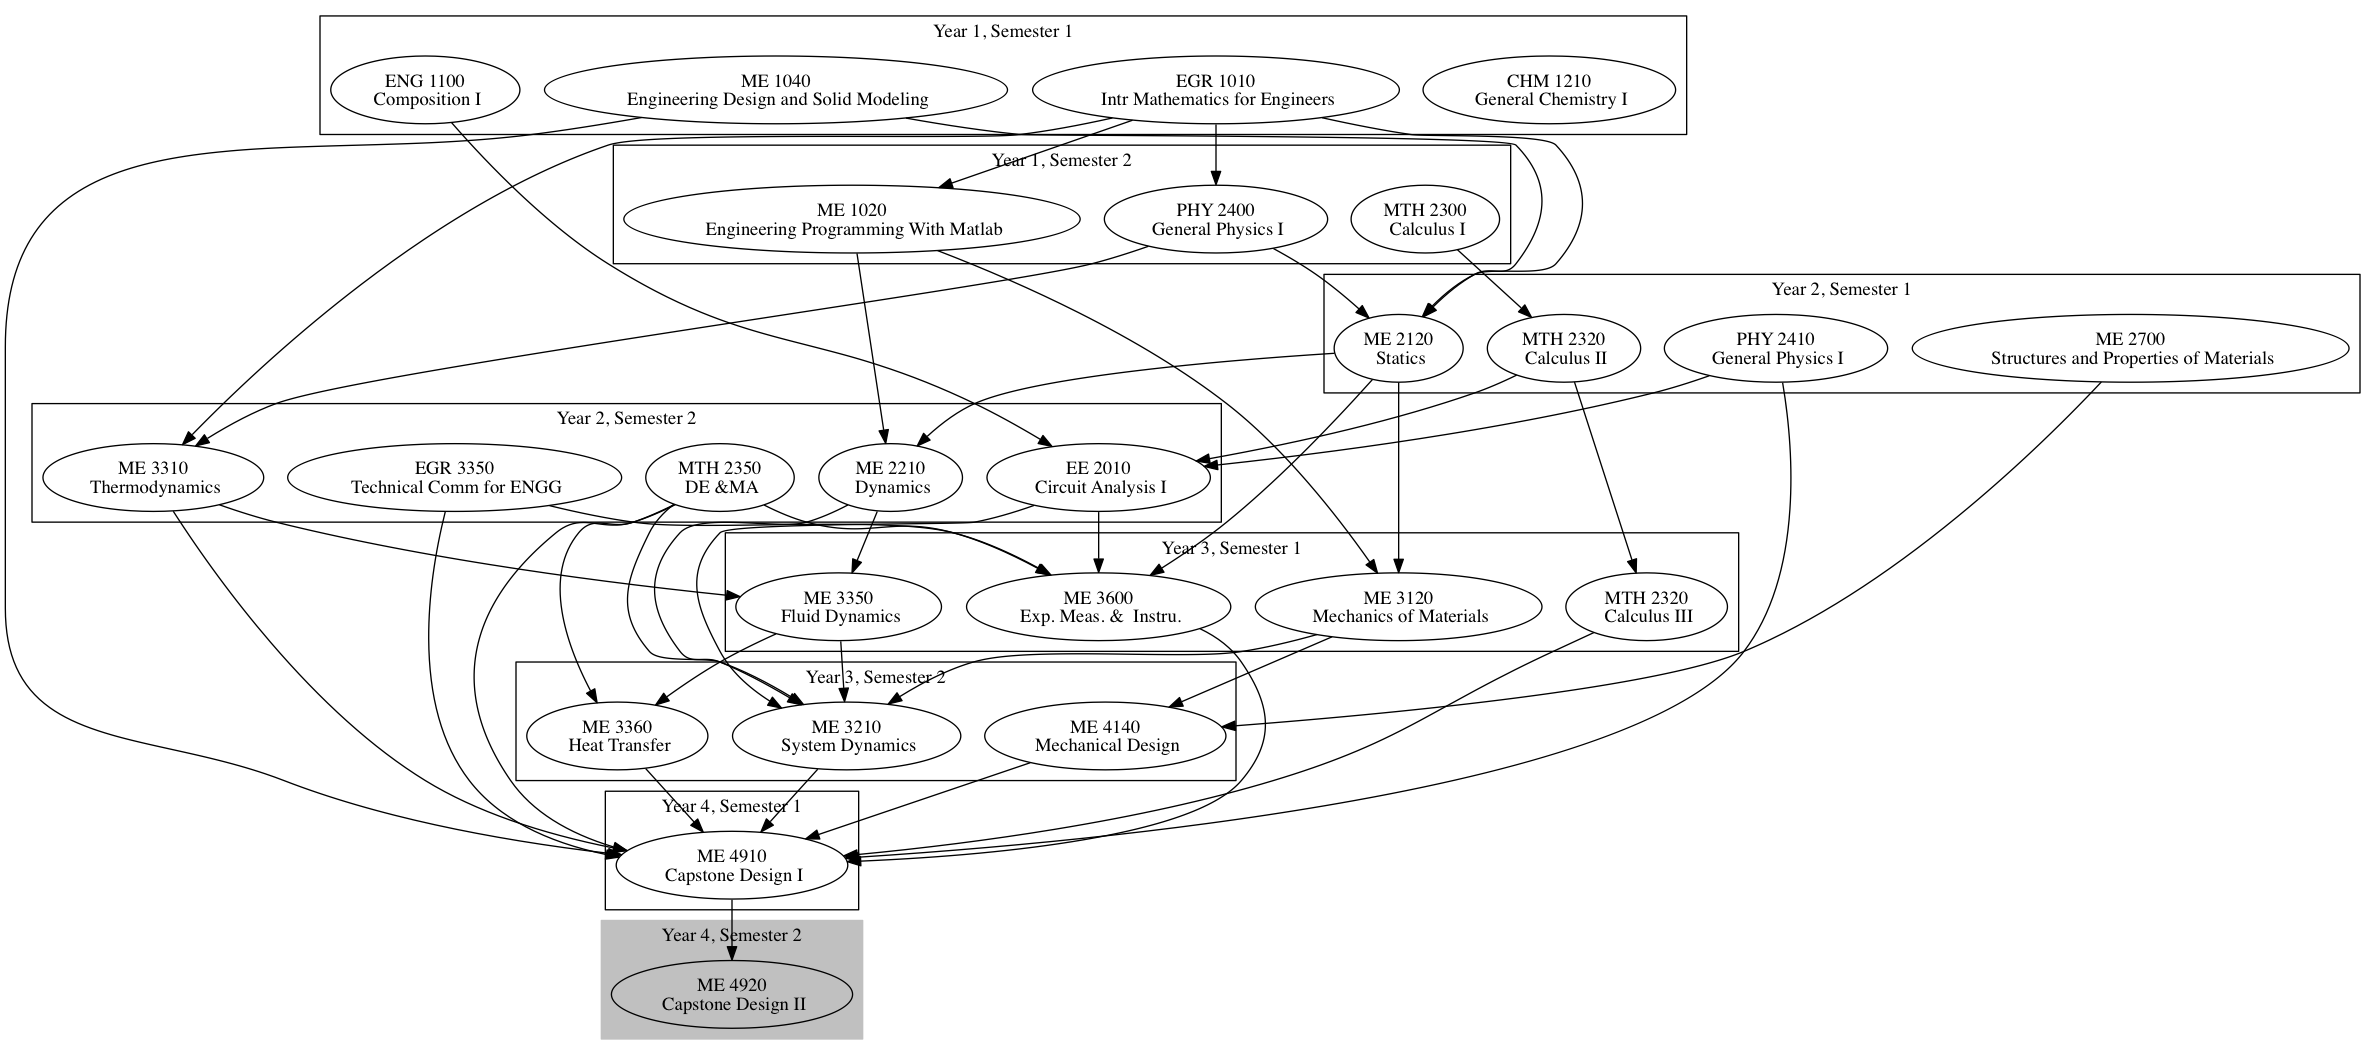

In [82]:
%%dot
digraph {
    subgraph cluster_0 {
    label="Year 1, Semester 1";
    CHM1210 [label = "CHM 1210\n General Chemistry I"] ;
    EGR1010 [label = "EGR 1010\n Intr Mathematics for Engineers"] ;
    ENG1100 [label = "ENG 1100\n Composition I"] ;
    ME1040 [label ="ME 1040\n Engineering Design and Solid Modeling"]
  }
        
    subgraph cluster_1 {
    label="Year 1, Semester 2";
    MTH2300 [label = "MTH 2300\n Calculus I"] ;
    PHY2400 [label = "PHY 2400\n General Physics I"] ;
    ME1020 [label ="ME 1020\n Engineering Programming With Matlab"]
  }
    
    subgraph cluster_2 {
    label="Year 2, Semester 1";
    ME2120 [label = "ME 2120\n Statics"] ;
    ME2700 [label = "ME 2700\n Structures and Properties of Materials"] ;
    MTH2310 [label = "MTH 2320\n Calculus II"] ;
    PHY2410 [label = "PHY 2410\n General Physics I"] ;
    }
    
    subgraph cluster_3 {
    label="Year 2, Semester 2";
    ME2210 [label = "ME 2210\n Dynamics"] ;
    EE2010  [label = "EE 2010\n Circuit Analysis I"];
    ME3310 [label = "ME 3310\n Thermodynamics"] ;
    MTH2350 [label = "MTH 2350\n DE &MA"] ;
    EGR3350 [label = "EGR 3350\n Technical Comm for ENGG"] ;
    }
    
    subgraph cluster_4 {
    label="Year 3, Semester 1";
    ME3120 [label = "ME 3120\n Mechanics of Materials"] ;
    ME3600  [label = "ME 3600\n Exp. Meas. &  Instru."];
    ME3350 [label = "ME 3350\n Fluid Dynamics"] ;
    MTH2320 [label = "MTH 2320\n Calculus III"] ;
    EGR3350 [label = "EGR 3350\n Technical Comm for ENGG"] ;
    }

    subgraph cluster_5 {
    label="Year 3, Semester 2";
    ME4140 [label = "ME 4140\n Mechanical Design"] ;
    ME3210  [label = "ME 3210\n System Dynamics"];
    ME3360 [label = "ME 3360\n Heat Transfer"] ;
    }
    
    subgraph cluster_6 {
    label="Year 4, Semester 1";
    ME4910 [label = "ME 4910\n Capstone Design I"] ;
    }
    
    subgraph cluster_7 {style=filled;
                        color="grey";
    label="Year 4, Semester 2";
    ME4920 [label = "ME 4920\n Capstone Design II"] ;
    }
    


EGR1010->ME1020;
EGR1010->PHY2400;
MTH2300->MTH2310;
{ME1040, EGR1010, PHY2400}->ME2120; 
{ENG1100, MTH2310, PHY2410}->EE2010    
{ME2120, ME1020}->ME2210;
{EGR1010, PHY2400}->ME3310;
{MTH2310}->MTH2320;
{ME1020, ME2120}->ME3120;
{EE2010, EGR3350, ME2120, MTH2350}->ME3600;
{ME2210, ME3310}->ME3350;
    
{ME3350, MTH2350}->ME3360;
{EE2010, ME2210, ME3120, ME3350, MTH2350}->ME3210;
{ME2700, ME3120}->ME4140;
    
{ME1040, ME3210, ME3310, ME3360, ME3600, ME4140, EGR3350, MTH2320, MTH2350, PHY2410}->ME4910;
    
ME4910->ME4920;
}

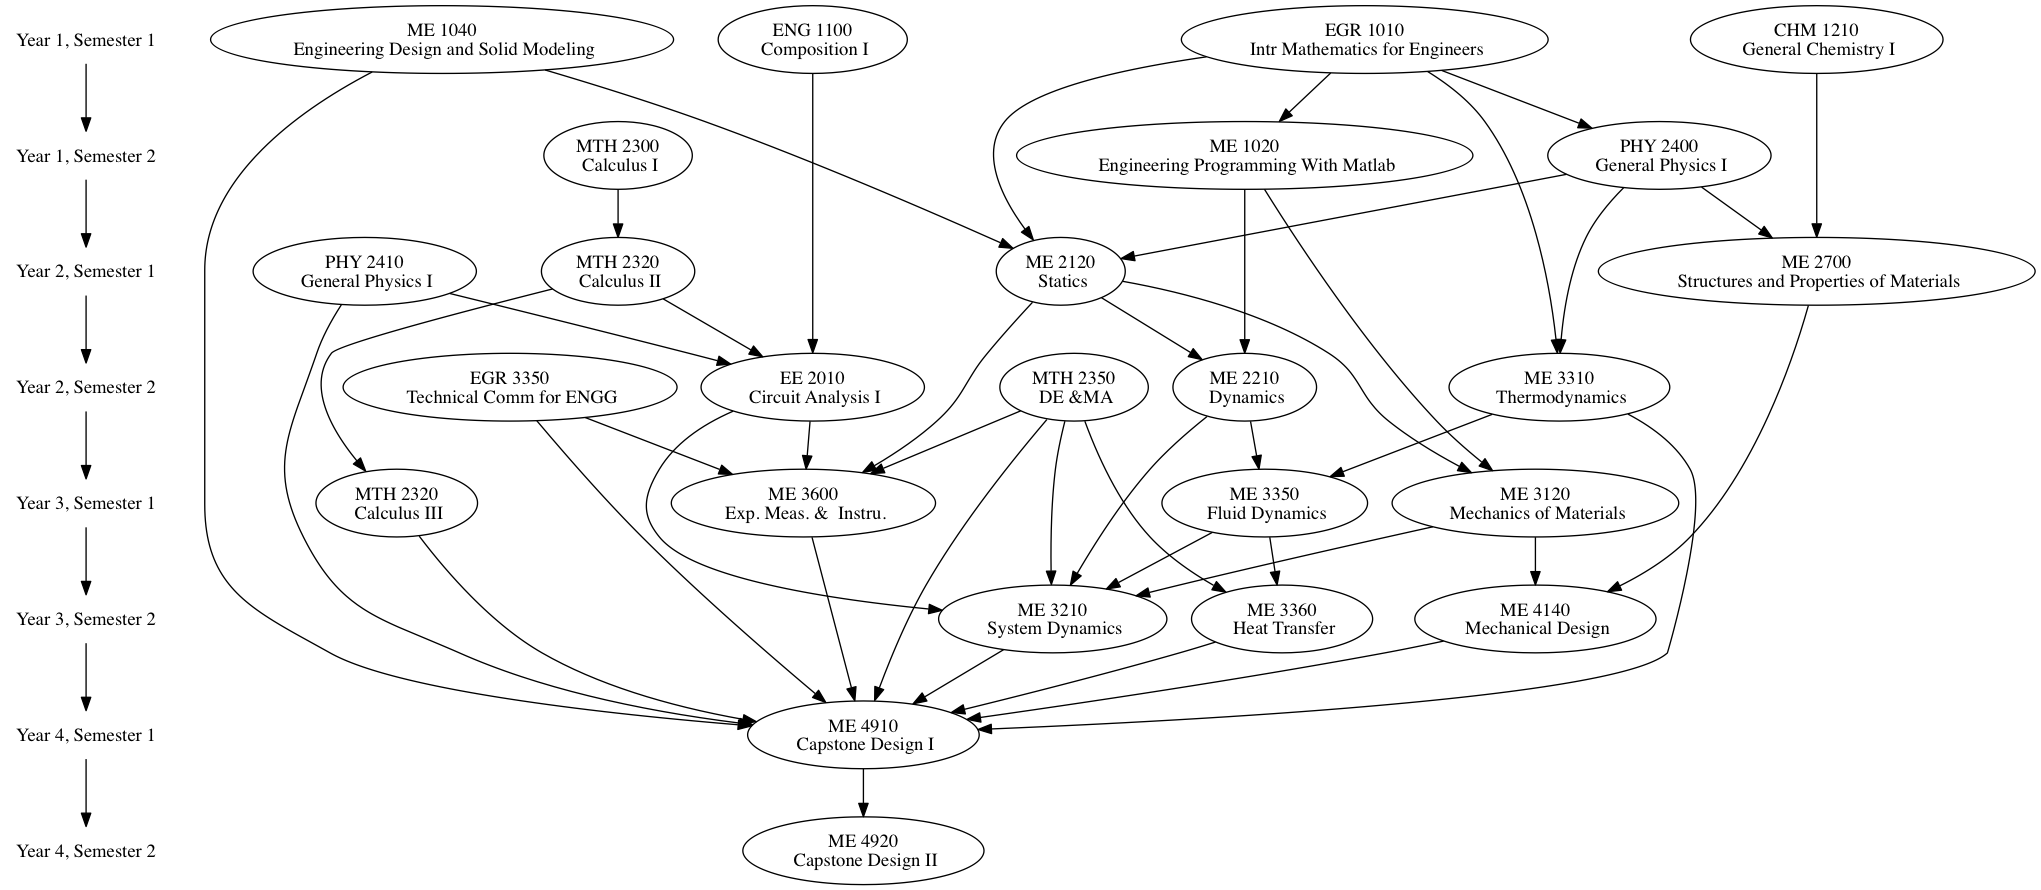

In [123]:
%%dot
digraph {
    
    
    { rank = same;
    Y1S1 [label ="Year 1, Semester 1", shape = none];
    CHM1210 [label = "CHM 1210\n General Chemistry I"] ;
    EGR1010 [label = "EGR 1010\n Intr Mathematics for Engineers"] ;
    ENG1100 [label = "ENG 1100\n Composition I"] ;
    ME1040 [label ="ME 1040\n Engineering Design and Solid Modeling"];
  }
        
    { rank = same;
    Y1S2 [label ="Year 1, Semester 2", shape = none];
    MTH2300 [label = "MTH 2300\n Calculus I"] ;
    PHY2400 [label = "PHY 2400\n General Physics I"] ;
    ME1020 [label ="ME 1020\n Engineering Programming With Matlab"]
  }
    
    { rank = same;
     Y2S1 [label ="Year 2, Semester 1", shape = none];
    ME2120 [label = "ME 2120\n Statics"] ;
    ME2700 [label = "ME 2700\n Structures and Properties of Materials"] ;
    MTH2310 [label = "MTH 2320\n Calculus II"] ;
    PHY2410 [label = "PHY 2410\n General Physics I"] ;
    }
    
    { rank = same;
    Y2S2 [label ="Year 2, Semester 2", shape = none];
    ME2210 [label = "ME 2210\n Dynamics"] ;
    EE2010  [label = "EE 2010\n Circuit Analysis I"];
    ME3310 [label = "ME 3310\n Thermodynamics"] ;
    MTH2350 [label = "MTH 2350\n DE &MA"] ;
    EGR3350 [label = "EGR 3350\n Technical Comm for ENGG"] ;
    }
    
    { rank = same;
    Y3S1 [label ="Year 3, Semester 1", shape = none] ;
    ME3120 [label = "ME 3120\n Mechanics of Materials"] ;
    ME3600  [label = "ME 3600\n Exp. Meas. &  Instru."];
    ME3350 [label = "ME 3350\n Fluid Dynamics"] ;
    MTH2320 [label = "MTH 2320\n Calculus III"] ;
    }


    { rank = same;
    Y3S2 [label ="Year 3, Semester 2", shape = none];
    ME4140 [label = "ME 4140\n Mechanical Design"] ;
    ME3210  [label = "ME 3210\n System Dynamics"];
    ME3360 [label = "ME 3360\n Heat Transfer"] ;
    }
    
    { rank = same;
    Y4S1 [label ="Year 4, Semester 1", shape = none];
    ME4910 [label = "ME 4910\n Capstone Design I"] ;
    }
    
    { rank = same;
     Y4S2 [label ="Year 4, Semester 2", shape = none] ;
    ME4920 [label = "ME 4920\n Capstone Design II"] ;
    }
    
    node [shape = box];
    {node [shape=box, fontsize=18, constraint=true];/*the time-line graph*/
     Y1S1-> 
     Y1S2-> 
     Y2S1-> 
     Y2S2->
     Y3S1-> 
     Y3S2-> 
     Y4S1-> 
     Y4S2}


EGR1010->ME1020;
EGR1010->PHY2400;
MTH2300->MTH2310;
    
    
{CHM1210, PHY2400} ->ME2700;    
{ME1040, EGR1010, PHY2400}->ME2120; 
{ENG1100, MTH2310, PHY2410}->EE2010;    
{ME2120, ME1020}->ME2210;
{EGR1010, PHY2400}->ME3310;
{MTH2310}->MTH2320;
{ME1020, ME2120}->ME3120;
{EE2010, EGR3350, ME2120, MTH2350}->ME3600;
{ME2210, ME3310}->ME3350;
    
{ME3350, MTH2350}->ME3360;
{EE2010, ME2210, ME3120, ME3350, MTH2350}->ME3210;
{ME2700, ME3120}->ME4140;
    
{ME1040, ME3210, ME3310, ME3360, ME3600, ME4140, EGR3350, MTH2320, MTH2350, PHY2410}->ME4910;
    
ME4910->ME4920;

}

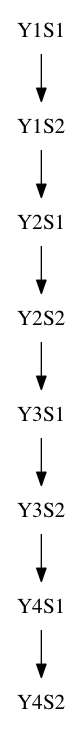

In [99]:
%%dot
digraph {
        {node [shape=plaintext, fontsize=16];/*the time-line graph*/
     Y1S1 -> 
     Y1S2 -> 
     Y2S1 -> 
     Y2S2 -> 
     Y3S1 -> 
     Y3S2 -> 
     Y4S1 -> 
     Y4S2}
}